# Lab 2: Titanic

The RMS Titanic is an infamous passenger ship which was built in 1912 and sank on its maiden voyage. A number of passengers survived its sinking; however, the probability of survival depended on the farepaid by the passenger.

This notebook aims to show how the relationship between the fare paid and survival from the ship’s sinking.

In [48]:
import pandas as pd

data = pd.read_csv('train.csv') 
data.set_index('PassengerId', inplace=True)

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


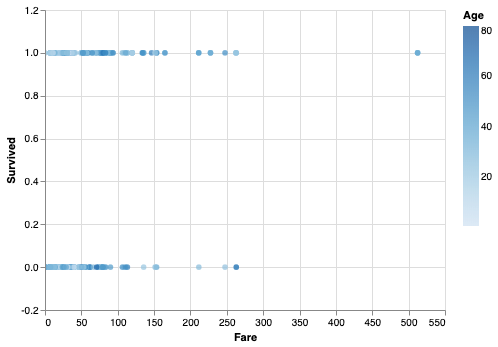

In [44]:
import altair as alt

alt.renderers.enable('notebook')

alt.Chart(data).mark_circle().encode(
    alt.X('Fare'),
    alt.Y('Survived', scale=alt.Scale(domain=[-.2, 1.2])),
    color='Age',
    tooltip=['Name', 'Sex', 'Age', 'Fare', 'Survived']
).interactive()

## Chart

This chart is a binned histogram that groups fare prices and calculates the percent of people that survived within each fare group.

This chart shows an general upward trend of percent survived. Note that the color represents the number of people in each fare group.

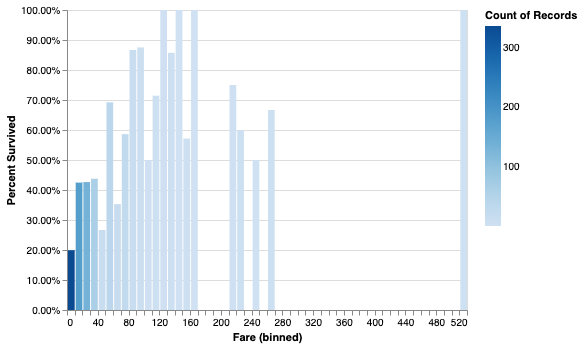

In [74]:
chart = alt.Chart(data).mark_bar(tooltip={"content": "encoding"}).encode(
    alt.X('Fare', bin=alt.Bin(maxbins=60)),
    alt.Y('average(Survived)', axis=alt.Axis(format='.2%'), title='Percent Survived'),
    alt.Color('count()')
).interactive()

chart